# Question #1

In [974]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.simplefilter('ignore', np.RankWarning)
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

## Part 1

Consider a 3rd order polynomial:

$$f(x) = a_0 + a_1x + a_2x_2 + a_3x_3$$

Suppose we are given a set of samples of this function $$(x_i, y_i))$$ for $$1 \leq i\leq N$$.

The least squares residual is given by $$R =(y_i - f(xi))^2$$

Using calculus, determine the values for $$a_0, a_1, a_2, a_3$$ that minimize this residual. Hint 1: consider where the residual R is at a minimum. Hint 2: Try to write in matrix form in terms of a linear system of equations. Write $$a_0, a_1, a_2, a_3$$in those terms. 

## Create a samples of 3rd order polynomial

In [975]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### least sqaure formulation  B = t(A) * A; yi =t(A) * b

In [976]:
xi= np.linspace(0,1,51)

## Compute y_i from the samples

In [977]:
yi = 1+xi+xi**2+xi**3

### least square probelm min||Ax-b||_2

### Construct matrix A-->vertically stack elements (Vandermonde matrix)

In [978]:
A = np.vstack([np.ones(len(xi)), xi, xi**2, xi**3]).T
A

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [1.00000e+00, 2.00000e-02, 4.00000e-04, 8.00000e-06],
       [1.00000e+00, 4.00000e-02, 1.60000e-03, 6.40000e-05],
       [1.00000e+00, 6.00000e-02, 3.60000e-03, 2.16000e-04],
       [1.00000e+00, 8.00000e-02, 6.40000e-03, 5.12000e-04],
       [1.00000e+00, 1.00000e-01, 1.00000e-02, 1.00000e-03],
       [1.00000e+00, 1.20000e-01, 1.44000e-02, 1.72800e-03],
       [1.00000e+00, 1.40000e-01, 1.96000e-02, 2.74400e-03],
       [1.00000e+00, 1.60000e-01, 2.56000e-02, 4.09600e-03],
       [1.00000e+00, 1.80000e-01, 3.24000e-02, 5.83200e-03],
       [1.00000e+00, 2.00000e-01, 4.00000e-02, 8.00000e-03],
       [1.00000e+00, 2.20000e-01, 4.84000e-02, 1.06480e-02],
       [1.00000e+00, 2.40000e-01, 5.76000e-02, 1.38240e-02],
       [1.00000e+00, 2.60000e-01, 6.76000e-02, 1.75760e-02],
       [1.00000e+00, 2.80000e-01, 7.84000e-02, 2.19520e-02],
       [1.00000e+00, 3.00000e-01, 9.00000e-02, 2.70000e-02],
       [1.00000e+00, 3.2

### Construct y_i as column vector 

In [979]:
yi = yi[:,np.newaxis]

In [980]:
coeffs = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)), yi)
coeffs

array([[1.],
       [1.],
       [1.],
       [1.]])

### reconstruct the polynomial based on coefficient

In [981]:
yi_hat = 1 + coeffs_a[0]*xi + coeffs_a[1]*xi**2 + coeffs_a[2]*xi**3
yi_hat

array([1.      , 1.020408, 1.041664, 1.063816, 1.086912, 1.111   ,
       1.136128, 1.162344, 1.189696, 1.218232, 1.248   , 1.279048,
       1.311424, 1.345176, 1.380352, 1.417   , 1.455168, 1.494904,
       1.536256, 1.579272, 1.624   , 1.670488, 1.718784, 1.768936,
       1.820992, 1.875   , 1.931008, 1.989064, 2.049216, 2.111512,
       2.176   , 2.242728, 2.311744, 2.383096, 2.456832, 2.533   ,
       2.611648, 2.692824, 2.776576, 2.862952, 2.952   , 3.043768,
       3.138304, 3.235656, 3.335872, 3.439   , 3.545088, 3.654184,
       3.766336, 3.881592, 4.      ])

### Plot x_i, y_i

<function matplotlib.pyplot.show(close=None, block=None)>

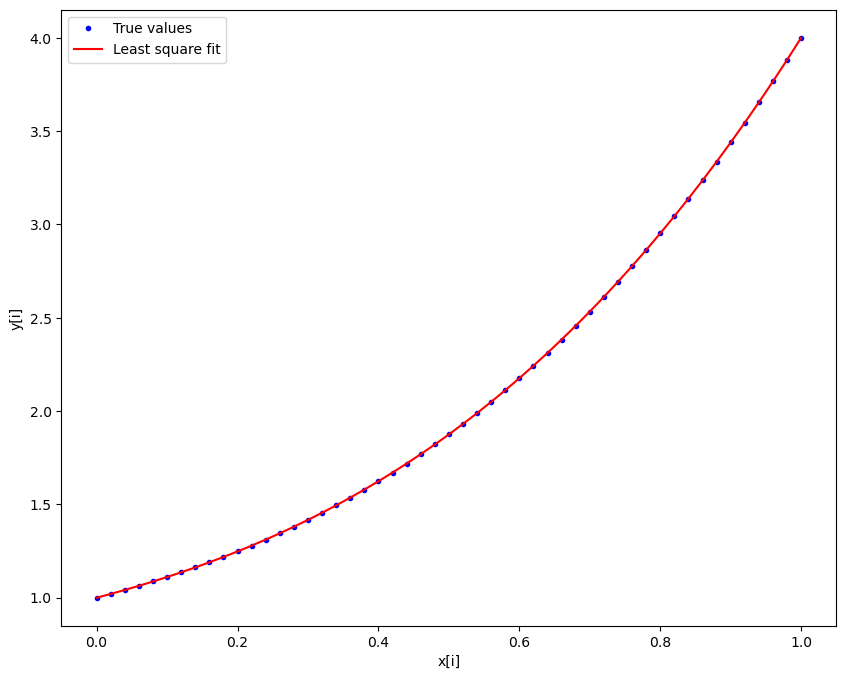

In [982]:
plt.figure(num = 1, figsize = (10,8))
plt.plot(xi, yi, 'b.',label="True values")
plt.plot(xi, yi_hat, 'r', label="Least square fit")
plt.xlabel('x[i]')
plt.ylabel('y[i]')
plt.legend()
plt.show

### for verification that if the above method is working sucessfully

In [983]:
alpha = np.linalg.lstsq(A, yi, rcond=None)[0]
print(alpha)

[[1.]
 [1.]
 [1.]
 [1.]]


# Question #2

#### Consider the function f(x) = xsin(x).  Write code to take samples of this function (at least 50).  Addnormally-distributed random noise to the function

In [984]:
def f(x):
    return ((x * np.sin(x)) + np.random.normal(scale=1,size=(len(x))))

#### Write code to take samples of this function (at least 50)

In [985]:
start = 0
end =  100
nstep = 1
x = np.arange(0,100,1)
y = f(x)
print('y for xsinc', y)

y for xsinc [  1.76405235   1.24162819   2.79733284   2.66425322  -1.15965199
  -5.77189925  -0.72640457   4.44754898   7.81164712   4.11966487
  -5.29616754  -9.54561877  -5.67783729   5.5838465   14.31236621
  10.08799193  -3.11237399 -16.54891563 -13.20470274   1.99357124
  15.7059152   18.223387     0.66970739 -20.20523432 -19.46412606
  -4.76315943  19.87227823  25.63496622   9.11814129 -17.77602387
 -29.4860013  -12.14700449  16.75786805  31.01629492  17.64089918
 -14.83004446 -34.47374804 -22.60853109  10.87467917  37.28571731
  28.75597345  -7.92354736 -40.2001752  -33.81553854   0.26923252
  37.8525843   40.22946863   6.58542712 -38.49012159 -46.94662027
 -14.01420925  34.56859047  50.79382965  19.80340078 -30.20279087
 -54.55820266 -29.14033889  25.16386295  56.9522915   37.20480126
 -18.96109771 -59.29273713 -46.64234947   8.81712652  59.05909259
  53.34208323  -3.38257451 -56.85705634 -61.96638065  -7.86820676
  54.90143827  67.65386329  19.4146828  -50.63917867 -72.4984816

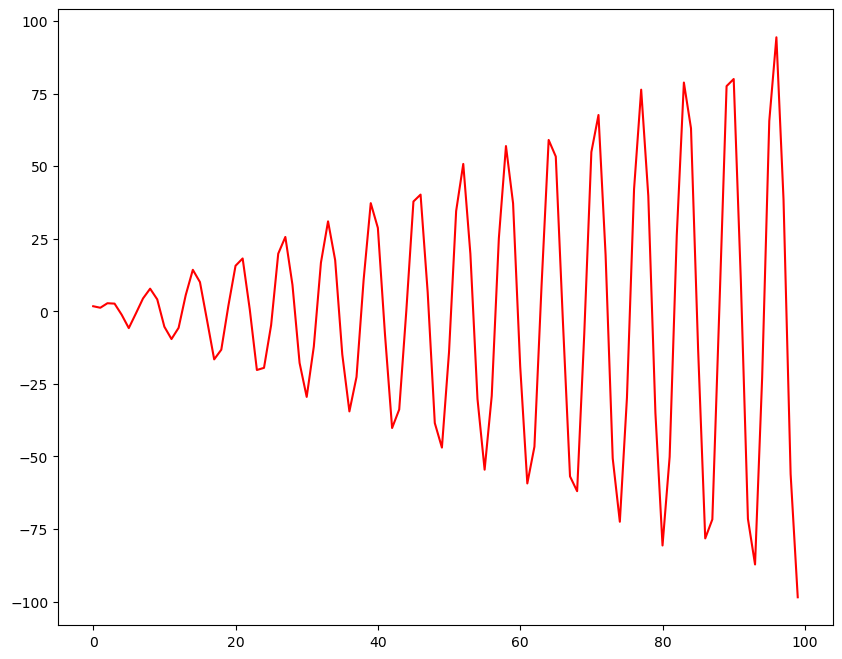

In [986]:
plt.figure(num=2,figsize=(10,8))
plt.plot(x,y,'r')
plt.show()

### Reconstruct the function using the given samples using polynomial models as we did in class. 


In [987]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [988]:
rng = np.random.RandomState(0)
x_train = np.linspace(0,100,100)
x_train = np.sort(rng.choice(x_train, size = 80, replace = False))
y_train = f(x_train)
x = x[:, np.newaxis]
x_train = x_train[:, np.newaxis]

### Ploynomial Fit. Try this reconstruction over at least 5 different polynomial orders (suggest linear up to 5th order). 

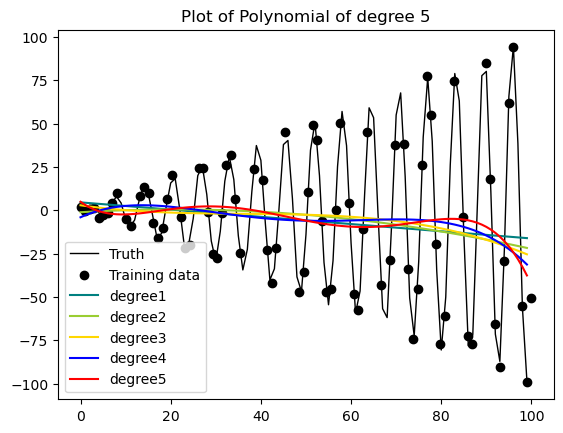

In [989]:
lw =1
fig, ax = plt.subplots()
ax.set_prop_cycle(color=["black","teal","yellowgreen","gold","blue","red"])
ax.plot(x,y,linewidth=lw,label="Truth")
ax.scatter(x_train, y_train, label ="Training data")


for degree in [1,2,3,4,5]:
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_model.fit(x_train, y_train)
    y_predict = poly_model.predict(x)
    ax.plot(x,y_predict, label = f"degree{degree}")
    y_predict = poly_model.predict(x)
    r2 = r2_score(y, y_predict) 

plt.title("Plot of Polynomial of degree 5")    
plt.legend()
plt.show()

# Which order of polynomial gives the best reconstruction and why? Use the model assessment methodology we have discussed in class

Best degree 1 with RMSE 38.74020255978774


Text(0, 0.5, 'RMSE')

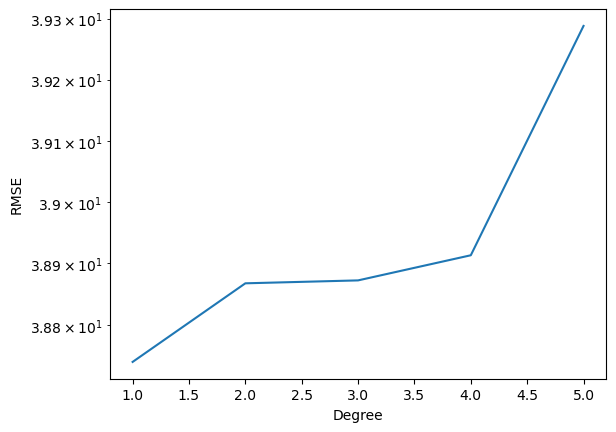

In [990]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

np.random.seed(0)
rmses = []
degrees = np.arange(1,6)
min_rmse, min_deg = 1e10, 0

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(x_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(x_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

# Plot and present results
print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))
        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')


## The best model given with the less RMSE

# Question #3
Consider a model of the form:\
$$1 + x + x^2 + log(x)$$
a. Plot this function.

[   3.            7.69314718   14.09861229   22.38629436   32.60943791
   44.79175947   58.94591015   75.07944154   93.19722458  113.30258509
  135.39789527  159.48490665  185.56494936  213.63905733  243.7080502
  275.77258872  309.83321334  345.89037176  383.94443898  423.99573227
  466.04452244  510.09104245  556.13549422  604.17805383  654.21887582
  706.25809654  760.29583687  816.33220451  874.36729583  934.40119738
  996.4339872  1060.4657359  1126.49650756 1194.52636052 1264.55534806
 1336.58351894 1410.61091791 1486.63758616 1564.66356165 1644.68887945
 1726.71357207 1810.73766962 1896.76120012 1984.78418963 2074.80666249
 2166.8286414  2260.8501476  2356.87120101 2454.8918203 ]


<function matplotlib.pyplot.show(close=None, block=None)>

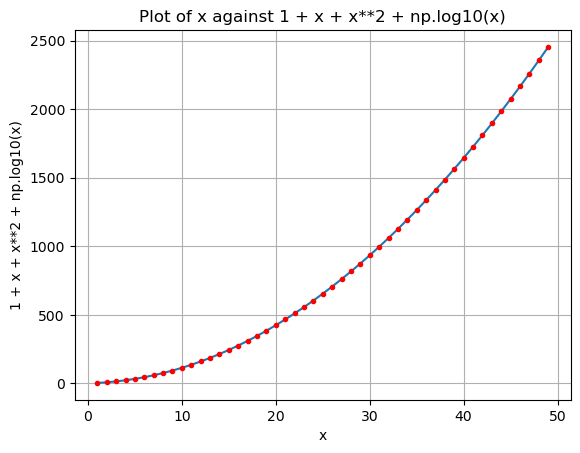

In [991]:
x3 = np.arange(1,50,1)
y3 = 1 + x3 + (x3**2) + np.log(x3)
print(y3)
plt.plot(x3,y3)
plt.figure(num = 1, figsize = (10,8))
plt.plot(x3, y3, 'r.')
plt.title("Plot of x against 1 + x + x**2 + np.log10(x)")
plt.grid()
plt.xlabel('x')
plt.ylabel('1 + x + x**2 + np.log10(x)')

plt.show

## Part 2
#### Generate a number of samples of this function and plot it. Add some random, normally distributed noise to this function

Printing y3 for 1 + x3 + (x3**2) + np.log(x3):  [ -0.41638296  -2.51881208  16.71308667  25.84403916  29.64077783
  53.87077797  53.12844745  75.26247561  92.44848918 119.43370195
 141.27533035 160.10469635 187.07759944 210.08791434 235.78486433
 274.38094012 310.45860922 350.81153448 388.75395837]


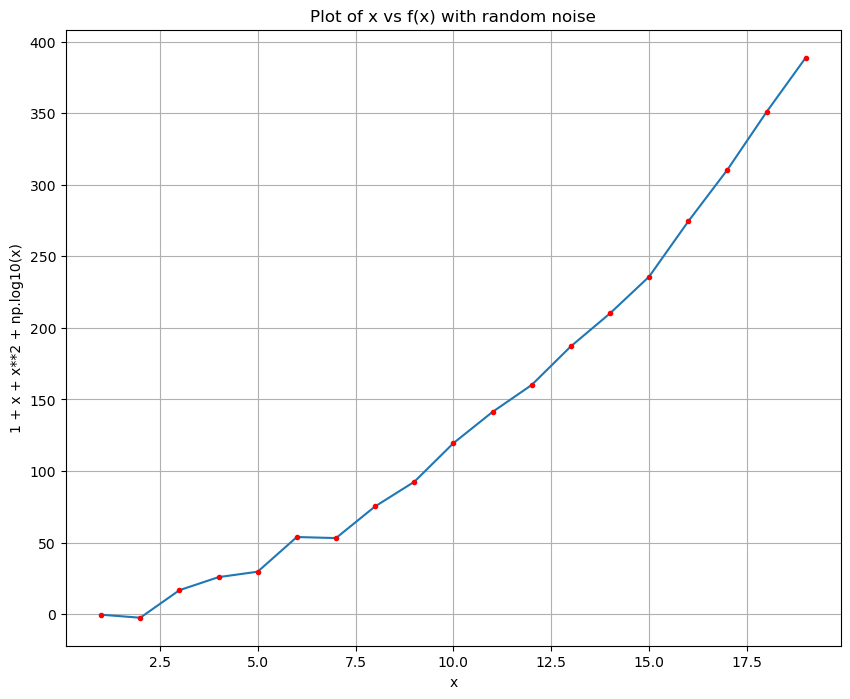

In [992]:
rng = np.random.RandomState(0)
def f1(x3):
    return ((1 + x3 + (x3**2) + np.log(x3)) + np.random.normal(scale=4,size=(len(x3))))
x3 = np.arange(1,20,1)
y3 = f1(x3)
#create 20 samples
START = 1
END =  20
NSTEP = 1
x3 =  np.arange(START,END,NSTEP)
y3 =  f1(x3)
print("Printing y3 for 1 + x3 + (x3**2) + np.log(x3): ", y3)
plt.figure(num=5,figsize=(10,8))
plt.grid()
plt.plot(x3,y3)
plt.plot(x3,y3,'r.')
plt.title("Plot of x vs f(x) with random noise")
plt.xlabel('x')
plt.ylabel('1 + x + x**2 + np.log10(x)')
plt.show()

## Part 2 Different method

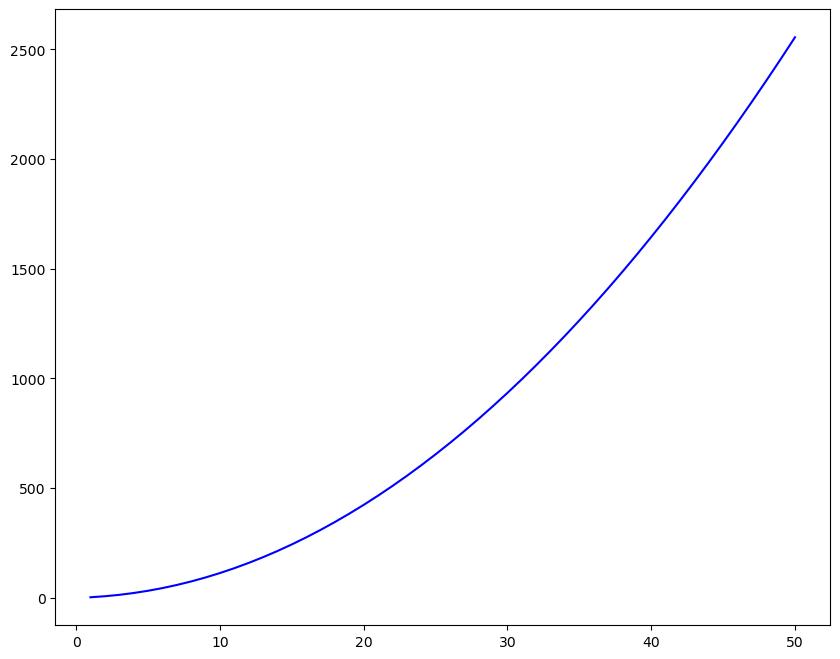

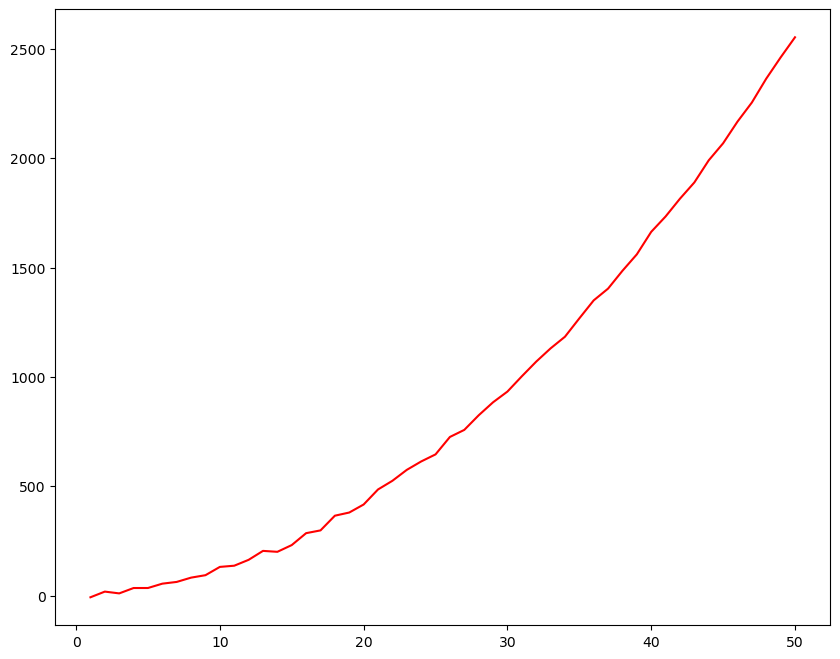

In [993]:
ng = np.random.RandomState(0)
def func(xx,n):
    return ((1 + xx + (xx**2) + np.log(xx)) + n*np.random.normal(scale=10,size=(len(xx))))
x3 = np.arange(1,51,1)
n1 = 0 #set noise off
n2 = 1 #set noise on
#create samples wthout noise
y3 = func(x3,n1)
#create samples with noise
y3n = func(x3,n2)

#plotting without noise
plt.figure(num=5,figsize=(10,8))
plt.plot(x3,y3,'-b')
plt.show()
#plotting with noise
plt.figure(num=5,figsize=(10,8))
plt.plot(x3,y3n,'-r')
plt.show()

# Reconstruct the original function from samples of the random noisey function in scikit learn

In [994]:
def noise_generator(x, add_noise = False):
    target = 1+x+x**2+np.log(x)
    if add_noise:
        rng = np.random.RandomState(1)
        target += rng.normal(0,0.3, size= target.shape)
    return target.squeeze()
    

In [995]:
x_new = np.arange(1,20,1)
y_new = noise_generator(x_new, add_noise=True)
print(y_new)

[  3.48730361   7.50962026  13.94016076  22.06440377  32.8690602
  44.10129786  59.46935368  74.85107947  93.29293631 113.22777398
 135.83652765 158.86686444 185.4682242  213.52384102 244.04818103
 275.44262134 309.78148488 345.62701423 383.9571031 ]


### Considering your knowledge here, What model would best work here

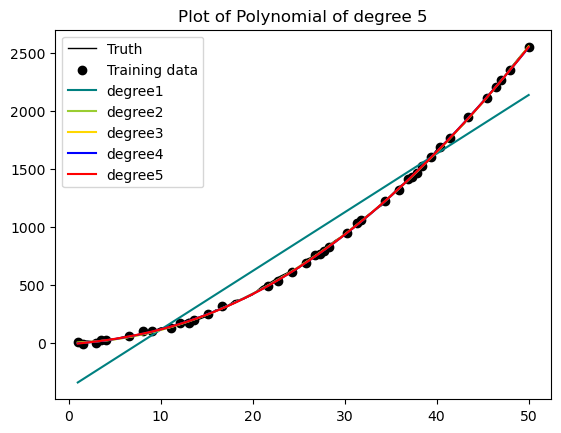

In [996]:
rng = np.random.RandomState(0)
x3_train = np.linspace(0,50,100)
x3_train =  np.sort(rng.choice(x3_train,size=40,replace=False))
y3n_train = func(x3_train,n2)

x3 =   x3[:,np.newaxis]
x3_train =  x3_train[:,np.newaxis]

lw =1
fig, ax = plt.subplots()
ax.set_prop_cycle(color=["black","teal","yellowgreen","gold","blue","red"])
ax.plot(x3,y3n,linewidth=lw,label="Truth")
ax.scatter(x3_train, y3n_train, label ="Training data")


for degree in [1,2,3,4,5]:
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_model.fit(x3_train, y3n_train)
    y_predict3 = poly_model.predict(x3)
    ax.plot(x3,y_predict3, label = f"degree{degree}")
    
   # r2 = r2_score(y3n, y_predict3) 

plt.title("Plot of Polynomial of degree 5")    
plt.legend()
plt.show()

Best degree 1 with RMSE 41.61948556189825


Text(0, 0.5, 'RMSE')

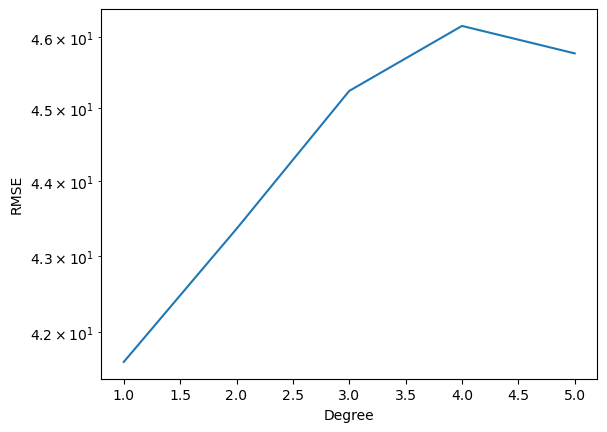

In [997]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6)

np.random.seed(0)
rmses = []
degrees = np.arange(1,6)
min_rmse, min_deg = 1e10, 0

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(x_train)
    y_predict3 = poly_model.predict(x3)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(x_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

# Plot and present results
print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))
        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')




In [1003]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.pipeline import *
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

x3, y3n = make_classification(random_state=42)
X3_train,X3_test,Y3n_train, Y3n_test= train_test_split(x3, y3n, random_state=42)
pipe = Pipeline([
        ('normalization', MinMaxScaler()),
        ('classifier', KNeighborsClassifier())
])
parameters = {
    'classifier__n_neighbors': [1,2,3,4,5,6,7,8,9] 
}
grid_search = GridSearchCV(pipe, parameters, cv=2)
grid_search.fit(X3_train, Y3n_train)
GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('normalization', MinMaxScaler()),
                                       
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__n_neighbors': [1,2,3,4,5,6,7,8,9]})

print("Best Accuracy: {}" .format(grid_search.best_score_))
print("Best num of neighbors: {}" .format(grid_search.best_estimator_.get_params()['classifier__n_neighbors']))

#pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(algorithm="auto"))
#pipe.fit(X3_train, Y3n_train)  # apply scaling on training data


Best Accuracy: 0.9470128022759602
Best num of neighbors: 3


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim